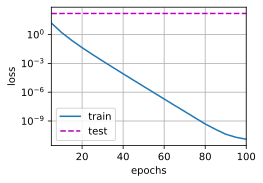

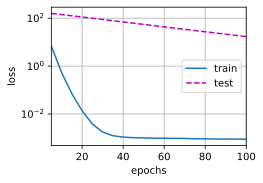

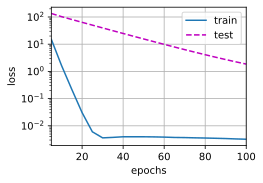

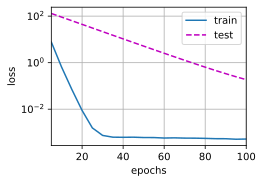

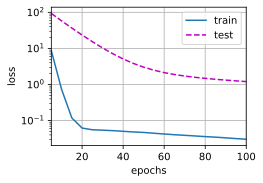

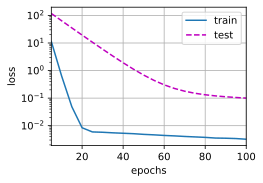

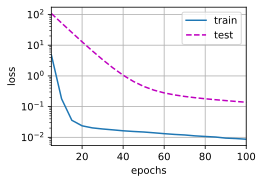

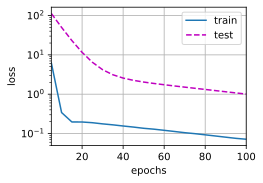

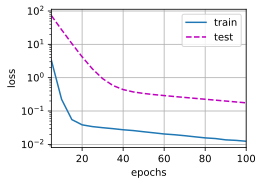

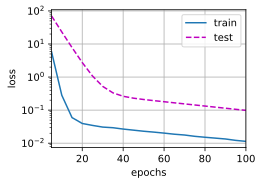

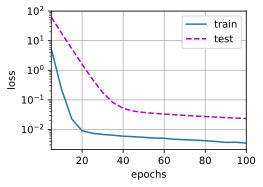

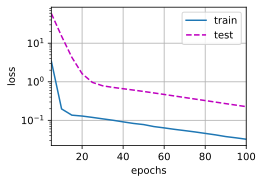

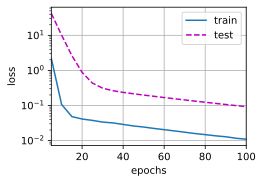

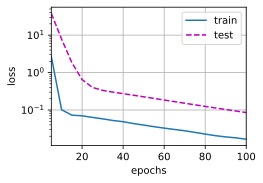

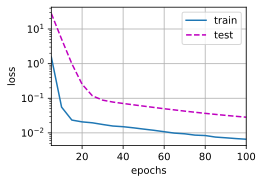

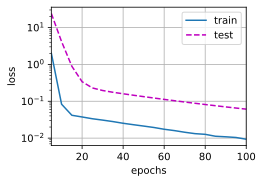

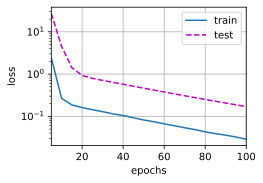

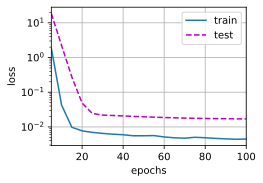

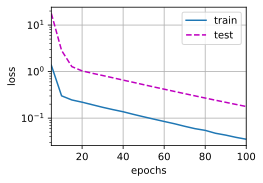

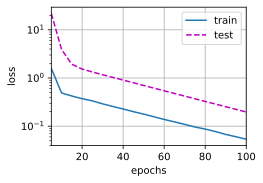

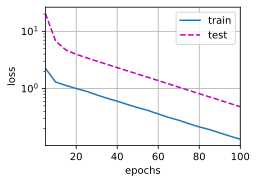

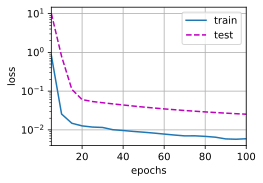

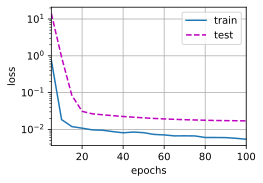

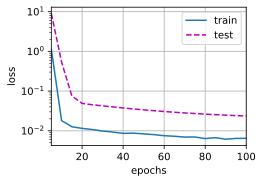

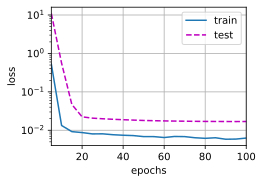

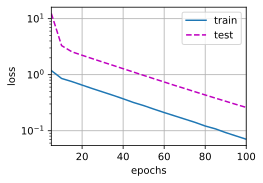

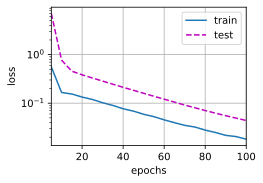

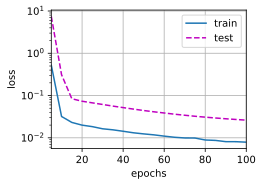

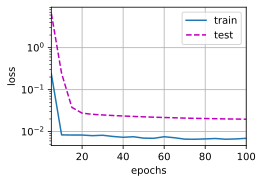

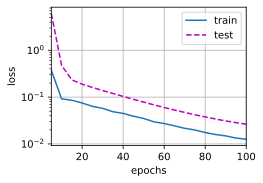

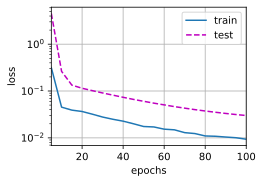

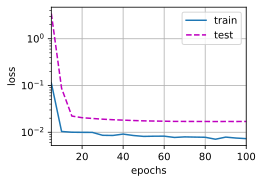

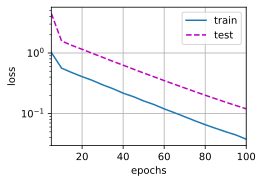

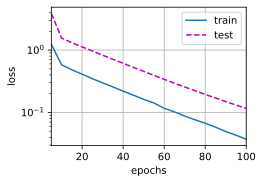

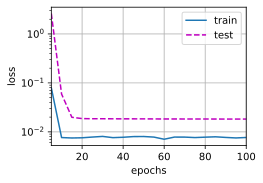

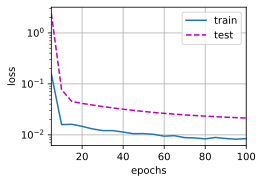

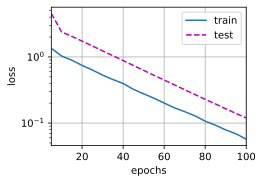

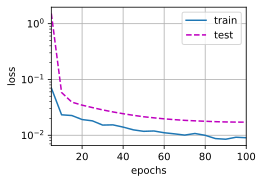

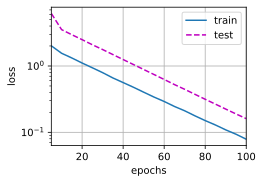

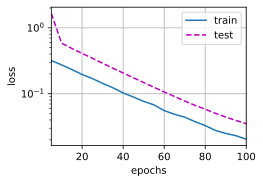

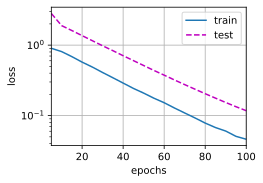

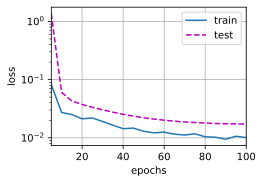

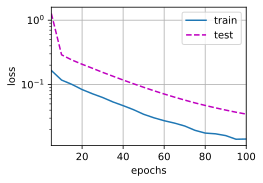

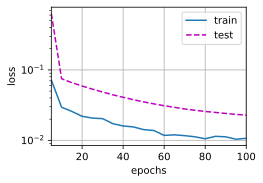

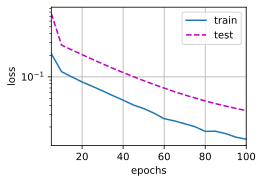

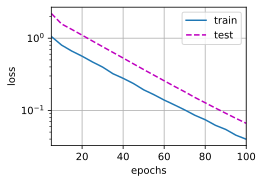

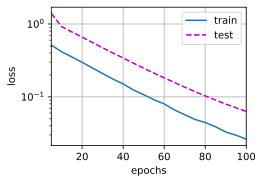

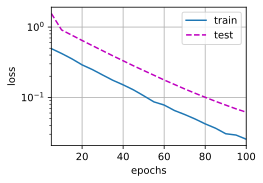

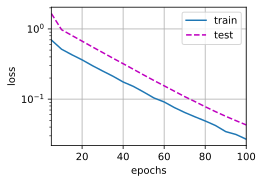

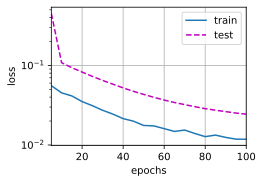

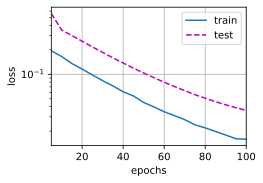

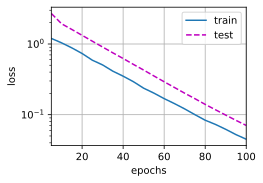

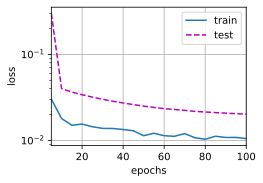

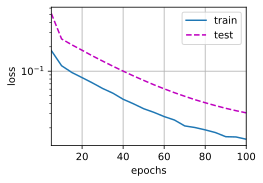

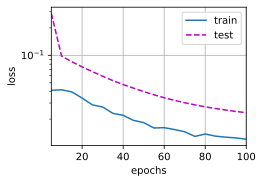

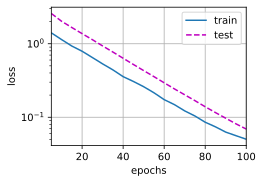

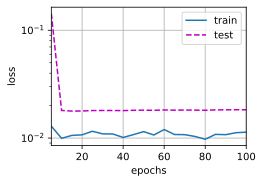

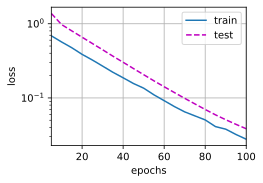

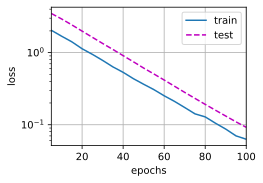

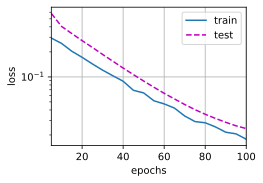

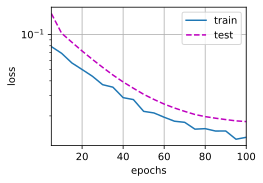

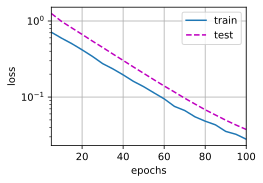

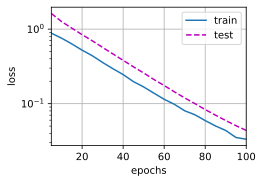

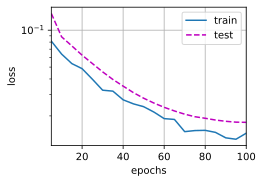

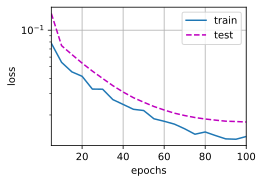

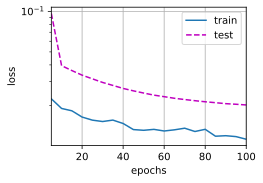

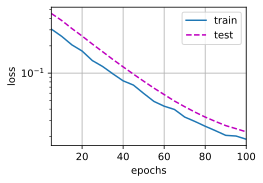

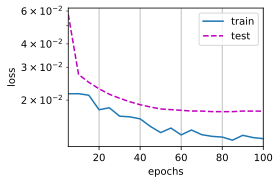

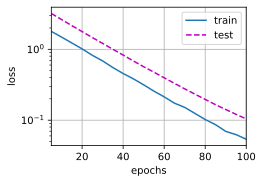

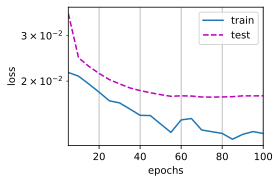

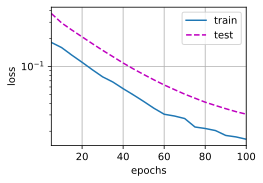

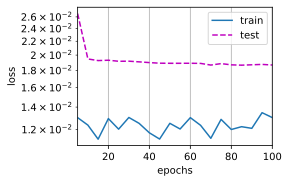

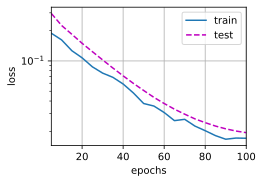

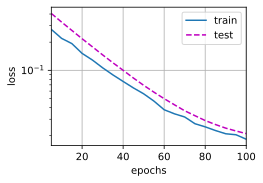

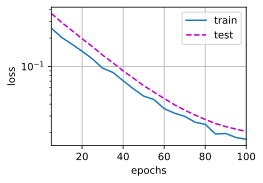

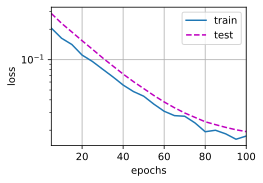

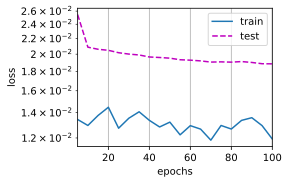

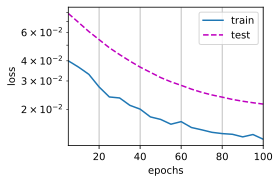

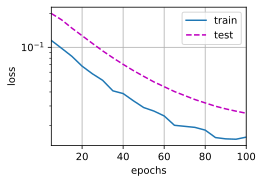

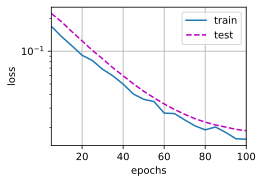

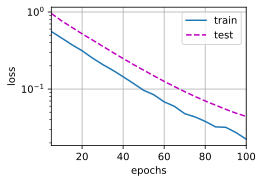

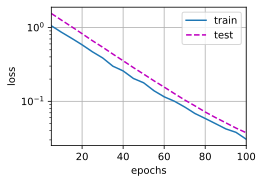

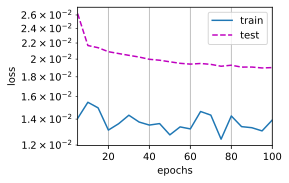

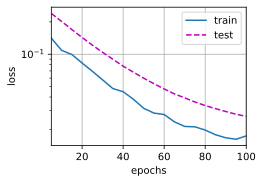

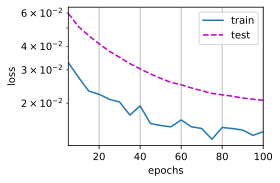

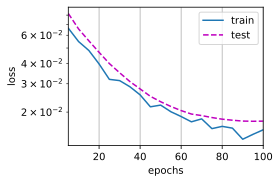

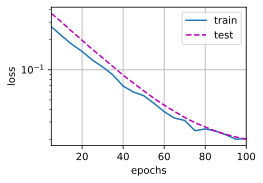

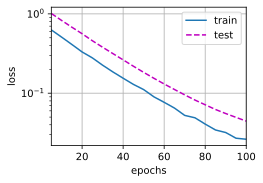

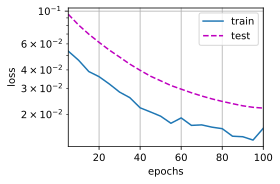

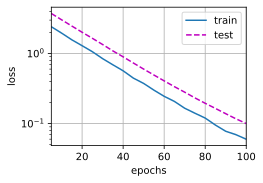

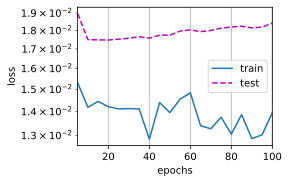

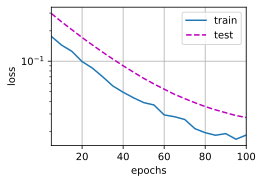

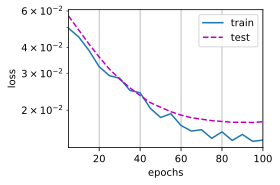

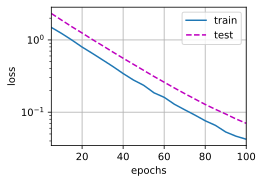

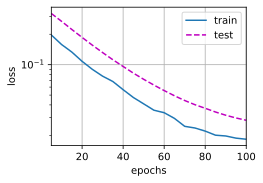

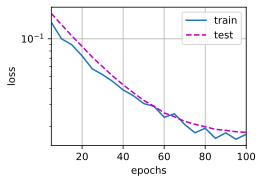

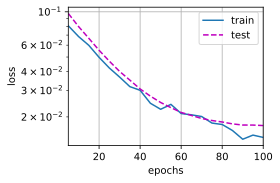

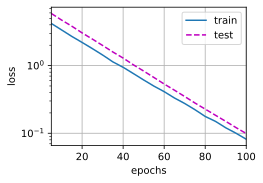

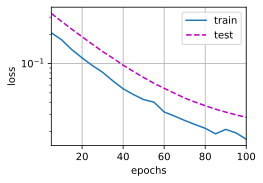

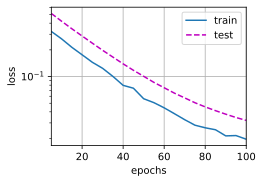

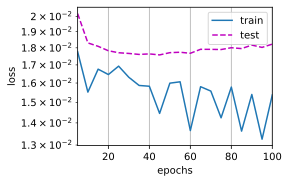

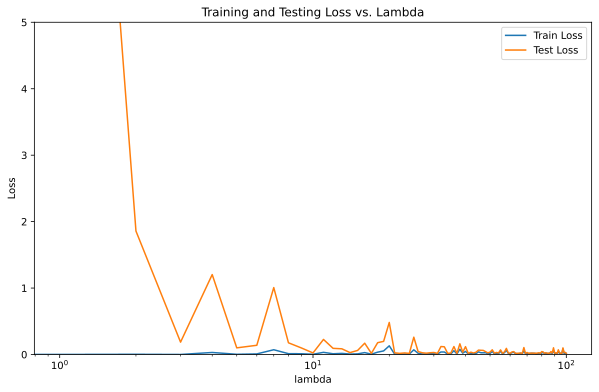

0.016912604523822664 24


In [9]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from d2l import torch as d2l

n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params": net[0].weight, 'weight_decay': wd},
        {"params": net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    train_loss = d2l.evaluate_loss(net, train_iter, loss)
    test_loss = d2l.evaluate_loss(net, test_iter, loss)
    return train_loss, test_loss, net[0].weight.norm().item()

lambdas = [i for i in range(0,101,1)]
train_losses = []
test_losses = []
norms = []

for wd in lambdas:
    train_loss, test_loss, norm = train_concise(wd)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    norms.append(norm)

plt.figure(figsize=(10, 6))
plt.plot(lambdas, train_losses, label='Train Loss')
plt.plot(lambdas, test_losses, label='Test Loss')
plt.xscale('log')
plt.ylim(0,5)
plt.xlabel('lambda')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss vs. Lambda')
plt.show()

perfect_loss = min(test_losses)
perfect_lambda = lambdas[test_losses.index(perfect_loss)]
print(perfect_loss, perfect_lambda)